# WeatherPy

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import os
from scipy.stats import linregress

os.chdir("../")   # change directory to import a shared output directory and API Key 

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy
from pprint import pprint

# Output File (CSV)
output_data_file = "Resources/output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
lat_lngs = []
cities = []

baseURL = "https://api.openweathermap.org/data/2.5/weather?"  # base URL for weatherAPI
units = 'imperial'       # Units for displaying weather in fahrenheit

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

citiesToProcess = pd.DataFrame (cities, columns = ['City'])

#setup the remaining columns 
citiesToProcess["Lat"]="" 
citiesToProcess["Lng"]="" 
citiesToProcess["Max Temp"]="" 
citiesToProcess["Humidity"]="" 
citiesToProcess["Cloudiness"]="" 
citiesToProcess["Wind Speed"]="" 
citiesToProcess["Country"]="" 
citiesToProcess["Date"]="" 
citiesToProcess.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ayagoz,,,,,,,,
1,imbituba,,,,,,,,
2,taolanaro,,,,,,,,
3,vaini,,,,,,,,
4,thompson,,,,,,,,


In [3]:
len(cities) # the length of expected items

640

In [4]:
citiesToProcess.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ayagoz,,,,,,,,
1,imbituba,,,,,,,,
2,taolanaro,,,,,,,,
3,vaini,,,,,,,,
4,thompson,,,,,,,,


### Perform API Calls
Process cities that are betwen latitude and longitude range

In [5]:
 # setup parameters for passing to API to generate URL based on respective city passed into URL
baseURL = "https://api.openweathermap.org/data/2.5/weather?"
units="imperial"

parameters = {
      "units":units,
     "appid":weather_api_key,
}
group = 1
recordCount = 1

print (f"Beginning Data Retrieval ")
print (f"------------------------ ")
for index, row in citiesToProcess.iterrows():
    #print(index)
    if recordCount <= 50 :
        parameters['q'] = citiesToProcess.loc[index,'City']
    
        print (f"Processing Record {recordCount} of Set  {group} | {citiesToProcess.loc[index,'City']} ")
        getCityData = requests.get(baseURL,params=parameters).json()

        try:
            #grab infomration from results key 
            citiesToProcess.loc[index,'City']=getCityData['name']
            citiesToProcess.loc[index,'Lat']=getCityData['coord']['lat']
            citiesToProcess.loc[index,'Lng']=getCityData['coord']['lon']
            citiesToProcess.loc[index,'Max Temp']=getCityData['main']['temp_max']
            citiesToProcess.loc[index,'Humidity']=getCityData['main']['humidity']
            citiesToProcess.loc[index,'Cloudiness']=getCityData['clouds']['all']
            citiesToProcess.loc[index,'Wind Speed']=getCityData['wind']['speed']
            citiesToProcess.loc[index,'Country']=getCityData['sys']['country']
            citiesToProcess.loc[index,'Date']=getCityData['dt']
            
            recordCount +=1   # control count for the conditional 
            time.sleep(2)   # pause between number of records processed

        except (KeyError,IndexError):
            print("City not found. Skipping...")
    else:
        recordCount  = 1
        group += 1
        
            

    #Processing Record 1 of Set 1 | butaritari
    
print (f"------------------------ ")
print (f"Data Retrieval Complete ")
print (f"------------------------ ")
    


Beginning Data Retrieval 
------------------------ 
Processing Record 1 of Set  1 | ayagoz 
Processing Record 2 of Set  1 | imbituba 
Processing Record 3 of Set  1 | taolanaro 
City not found. Skipping...
Processing Record 3 of Set  1 | vaini 
Processing Record 4 of Set  1 | thompson 
Processing Record 5 of Set  1 | punta arenas 
Processing Record 6 of Set  1 | illoqqortoormiut 
City not found. Skipping...
Processing Record 6 of Set  1 | rikitea 
Processing Record 7 of Set  1 | el naranjo 
Processing Record 8 of Set  1 | padang 
Processing Record 9 of Set  1 | sao filipe 
Processing Record 10 of Set  1 | ushuaia 
Processing Record 11 of Set  1 | husavik 
Processing Record 12 of Set  1 | krasnorechenskiy 
Processing Record 13 of Set  1 | albany 
Processing Record 14 of Set  1 | houma 
Processing Record 15 of Set  1 | new norfolk 
Processing Record 16 of Set  1 | daru 
Processing Record 17 of Set  1 | hilo 
Processing Record 18 of Set  1 | beringovskiy 
Processing Record 19 of Set  1 | t

Processing Record 21 of Set  4 | kavieng 
Processing Record 22 of Set  4 | nanding 
Processing Record 23 of Set  4 | collie 
Processing Record 24 of Set  4 | sarakhs 
Processing Record 25 of Set  4 | dukat 
Processing Record 26 of Set  4 | podgorica 
Processing Record 27 of Set  4 | dzhebariki-khaya 
Processing Record 28 of Set  4 | dingle 
Processing Record 29 of Set  4 | klaksvik 
Processing Record 30 of Set  4 | gigmoto 
Processing Record 31 of Set  4 | muisne 
Processing Record 32 of Set  4 | laredo 
Processing Record 33 of Set  4 | shelburne 
Processing Record 34 of Set  4 | amahai 
Processing Record 35 of Set  4 | urengoy 
Processing Record 36 of Set  4 | pisco 
Processing Record 37 of Set  4 | hobyo 
Processing Record 38 of Set  4 | adana 
Processing Record 39 of Set  4 | san patricio 
Processing Record 40 of Set  4 | palmer 
Processing Record 41 of Set  4 | arcos 
Processing Record 42 of Set  4 | marsabit 
Processing Record 43 of Set  4 | saint-francois 
Processing Record 44 of

Processing Record 40 of Set  7 | trincomalee 
Processing Record 41 of Set  7 | grand river south east 
City not found. Skipping...
Processing Record 41 of Set  7 | okha 
Processing Record 42 of Set  7 | constitucion 
Processing Record 43 of Set  7 | lodja 
Processing Record 44 of Set  7 | akureyri 
Processing Record 45 of Set  7 | asmar 
Processing Record 46 of Set  7 | kungurtug 
Processing Record 47 of Set  7 | denpasar 
Processing Record 48 of Set  7 | tres arroyos 
Processing Record 49 of Set  7 | pembroke 
Processing Record 50 of Set  7 | warqla 
City not found. Skipping...
Processing Record 50 of Set  7 | ilulissat 
Processing Record 1 of Set  8 | kariba 
Processing Record 2 of Set  8 | saint-augustin 
Processing Record 3 of Set  8 | kudat 
Processing Record 4 of Set  8 | mar del plata 
Processing Record 5 of Set  8 | key west 
Processing Record 6 of Set  8 | daoukro 
Processing Record 7 of Set  8 | xinmin 
Processing Record 8 of Set  8 | keti bandar 
Processing Record 9 of Set  

Processing Record 10 of Set  11 | dunedin 
Processing Record 11 of Set  11 | ambanja 
Processing Record 12 of Set  11 | puerto escondido 
Processing Record 13 of Set  11 | vostok 
Processing Record 14 of Set  11 | jodhpur 
Processing Record 15 of Set  11 | panzhihua 
Processing Record 16 of Set  11 | skelleftea 
Processing Record 17 of Set  11 | yerbogachen 
Processing Record 18 of Set  11 | bur gabo 
City not found. Skipping...
Processing Record 18 of Set  11 | nueva guinea 
Processing Record 19 of Set  11 | pochutla 
Processing Record 20 of Set  11 | naze 
Processing Record 21 of Set  11 | kawalu 
Processing Record 22 of Set  11 | guajara-mirim 
City not found. Skipping...
Processing Record 22 of Set  11 | pemangkat 
Processing Record 23 of Set  11 | jaciara 
Processing Record 24 of Set  11 | tocopilla 
Processing Record 25 of Set  11 | daxian 
City not found. Skipping...
Processing Record 25 of Set  11 | gainesville 
Processing Record 26 of Set  11 | channel-port aux basques 
Proces

In [6]:
# Export to CSV 

citiesToProcess.to_csv(output_data_file)



In [7]:
# convert to a dataframe for future Processing
citiesDataDF=pd.DataFrame(citiesToProcess)
citiesDataDF.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ayagoz,47.9714,80.4392,52.5,41,14,16.6,KZ,1662924449
1,Imbituba,-28.24,-48.6703,59.63,59,72,5.88,BR,1662924451
2,taolanaro,,,,,,,,
3,Vaini,-21.2,-175.2,73.56,88,20,6.91,TO,1662924454
4,Thompson,55.7435,-97.8558,68.16,45,20,14.97,CA,1662924456


In [8]:
# convert columns to numeric datatype to gather statistics
citiesDataDF[['Lat','Lng','Max Temp','Humidity','Cloudiness','Wind Speed']] = citiesDataDF[['Lat','Lng','Max Temp','Humidity','Cloudiness','Wind Speed']].apply(pd.to_numeric)
citiesDataDF[['Lat','Lng','Max Temp','Humidity','Cloudiness','Wind Speed']] = citiesDataDF[['Lat','Lng','Max Temp','Humidity','Cloudiness','Wind Speed']]
print(citiesDataDF.dtypes)

City           object
Lat           float64
Lng           float64
Max Temp      float64
Humidity      float64
Cloudiness    float64
Wind Speed    float64
Country        object
Date           object
dtype: object


In [9]:
citiesDataDF.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
count,587.000000,587.000000,587.000000,587.000000,587.000000,587.000000
mean,20.780714,20.379784,66.814072,71.717206,56.601363,7.993543
std,33.113143,90.544582,15.798622,21.852244,40.500763,5.912589
min,-54.800000,-179.166700,30.250000,12.000000,0.000000,0.000000
25%,-6.169300,-61.014150,55.010000,64.000000,13.500000,3.960000
50%,26.585100,26.486900,70.340000,78.000000,68.000000,6.800000
75%,47.502050,100.403000,78.830000,87.000000,100.000000,10.925000
max,78.218600,179.316700,103.600000,100.000000,100.000000,54.090000


In [10]:
#  Get the indices of cities that have humidity over 100%.
hudmidityOver100 =citiesDataDF[(citiesDataDF['Humidity'] > 100)].index
print (hudmidityOver100)


Int64Index([], dtype='int64')


In [11]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data
clean_city_data = citiesDataDF.drop(hudmidityOver100, inplace=False)
clean_city_data.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ayagoz,47.9714,80.4392,52.50,41.0,14.0,16.60,KZ,1662924449
1,Imbituba,-28.2400,-48.6703,59.63,59.0,72.0,5.88,BR,1662924451
2,taolanaro,NaN,NaN,NaN,NaN,NaN,NaN,,
3,Vaini,-21.2000,-175.2000,73.56,88.0,20.0,6.91,TO,1662924454
4,Thompson,55.7435,-97.8558,68.16,45.0,20.0,14.97,CA,1662924456


In [12]:
# Assign variable for plotting
lat = clean_city_data["Lat"]
lng = clean_city_data["Lng"]
MaxTemp= clean_city_data["Max Temp"]
Humidity = clean_city_data["Humidity"]
Cloudiness = clean_city_data["Cloudiness"]
WindSpeed = clean_city_data["Wind Speed"]


## Plotting the Data


## Latitude vs. Temperature Plot

In [13]:
import seaborn as sns # added for better formatting
sns.set()


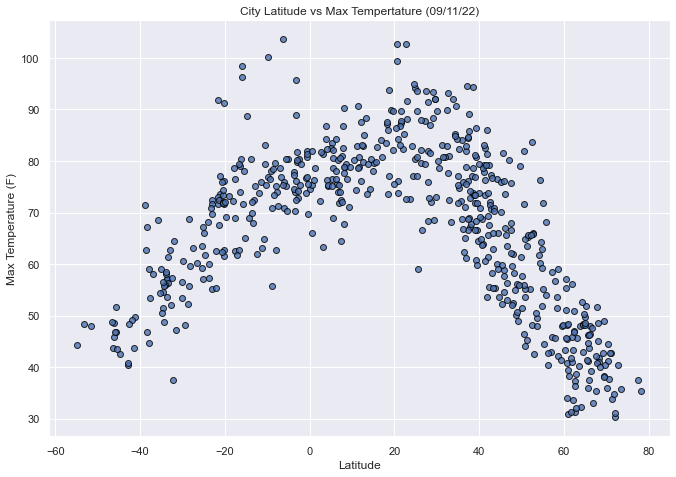

In [15]:
 # color x and y with background of white. update figure size that are based off of inches
    
f=plt.figure(facecolor=(1,1,1), figsize = (11.118, 7.65))
plt.scatter(lat, MaxTemp,edgecolors="black", linewidths=1,marker="o", alpha=0.8, label = "Cities")
plt.title("City Latitude vs Max Tempertature (%s)" % time.strftime("%x")) # add current data to chart
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)

#Save graph as a png
plt.savefig("assets/images/city_latitude_vs_temp.png")

#show plot
plt.show()

## Latitude vs. Humidity Plot

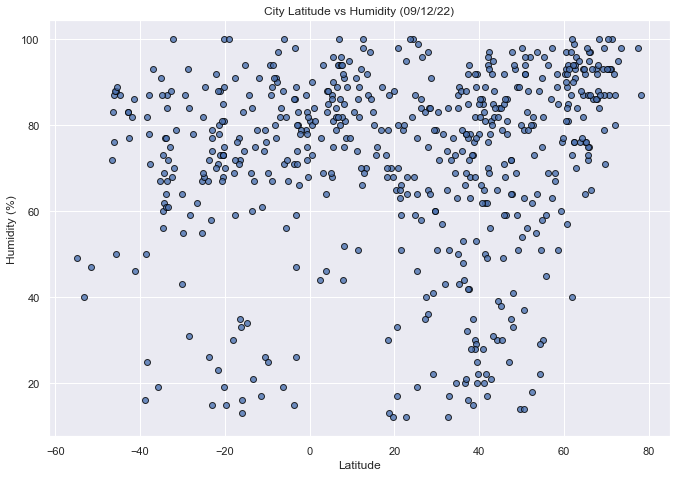

In [17]:
f=plt.figure(facecolor=(1,1,1), figsize = (11.118, 7.65))
plt.scatter(lat, Humidity,edgecolors="black", linewidths=1,marker="o", alpha=0.8, label = "Cities")
plt.title("City Latitude vs Humidity (%s)" % time.strftime("%x")) # add current data to chart
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

#Save graph as a png
plt.savefig("assets/images/city_latitude_vs_humidity.png")

#show plot
plt.show()

This day it was observed that the humditity is high closer to the equatoer there does not appear to be any correction between
the latitude and the humditiy.  Looking at the latitude between -40 and 60  there are a lot of cities with humdidity near 100. 

## Latitude vs. Cloudiness Plot

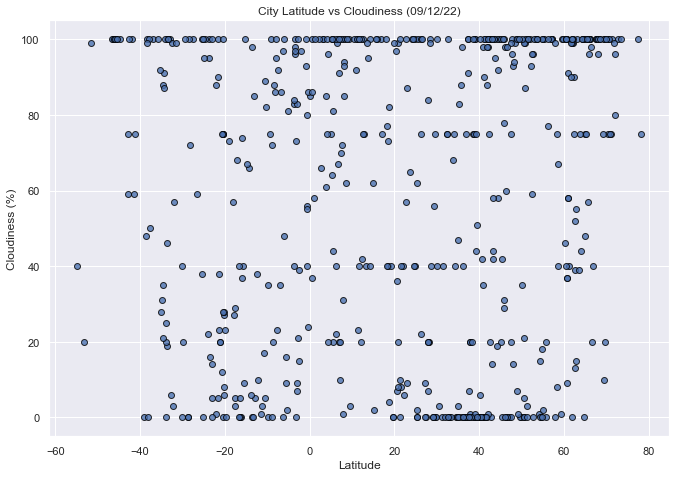

In [19]:
f=plt.figure(facecolor=(1,1,1), figsize = (11.118, 7.65))
plt.scatter(lat, Cloudiness,edgecolors="black", linewidths=1,marker="o", alpha=0.8, label = "Cities")
plt.title("City Latitude vs Cloudiness (%s)" % time.strftime("%x")) # add current data to chart
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

#Save graph as a png
plt.savefig("assets/images/city_latitude_vs_cloudiness.png")

#show plot
plt.show()

There is no noticable relationship between latitude and cloudiness.  The data indidcates that the cloudiness can occur 
high or low at any latitude

## Latitude vs. Wind Speed Plot

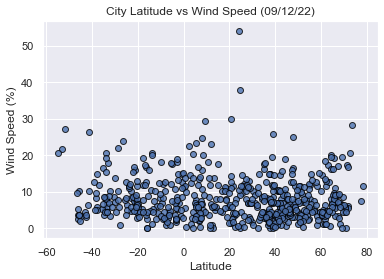

In [20]:
plt.scatter(lat, WindSpeed,edgecolors="black", linewidths=1,marker="o", alpha=0.8, label = "Cities")
plt.title("City Latitude vs Wind Speed (%s)" % time.strftime("%x")) # add current data to chart
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (%)")
plt.grid(True)

#Save graph as a png
plt.savefig("assets/images/city_latitude_vs_windspeed.png")

#show plot
plt.show()

## Linear Regression

In [21]:
#create a function to create linear regession plots 
def plot_linear_regression(x_values, y_values,title, text_coordinates):
    #run regression 
    (slope, intercept,rvalue, pvalues,stderr) = linregress(x_values,y_values)
    regress_values=x_values * slope + intercept
    line_eq = "y =" + str(round(slope,2)) + "x +" + str(round(intercept,2))
    
    # plot values
    plt.scatter(x_values, y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    plt.xlabel('Latitude')
    plt.ylabel (title)
    print(f"The r-value is: {rvalue**2}")
    plt.show()

In [22]:
#create northern and southern Hemisphere data fromes
northernHemiDF = clean_city_data.loc[(clean_city_data["Lat"]>=0)]
southernHemiDF = clean_city_data.loc[(clean_city_data["Lat"] < 0)]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.6201078734478201


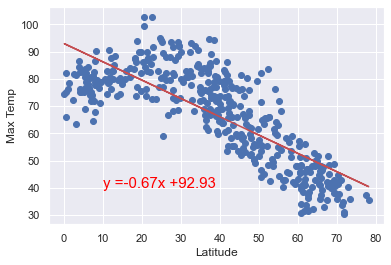

In [23]:
x_values = northernHemiDF["Lat"]
y_values = northernHemiDF["Max Temp"]
plot_linear_regression(x_values,y_values,'Max Temp',(10,40))

The r-value of 0.53 indicates that there is a moderate correlation between max tempatures and latitude in the northern hemisphere

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.6180935045187907


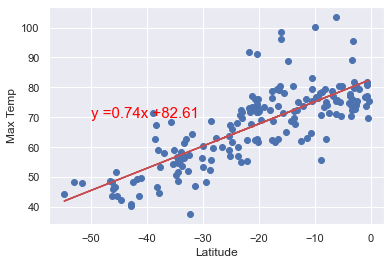

In [24]:
x_values = southernHemiDF["Lat"]
y_values = southernHemiDF["Max Temp"]
plot_linear_regression(x_values,y_values,'Max Temp',(-50,70))

The r-value of 0.59 indicates that there is a moderate correlation between the latitude and max tempatures in the Southern Hemisphere

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.009871576777592239


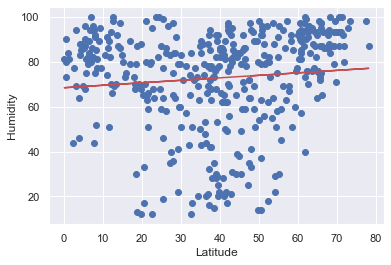

In [25]:
x_values = northernHemiDF["Lat"]
y_values = northernHemiDF["Humidity"]
plot_linear_regression(x_values,y_values,'Humidity',(0,5))

The r-value of 0.0004 indicates that there no correlation between latitude and humdity in the Northern Hemisphere

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.002271213684555026


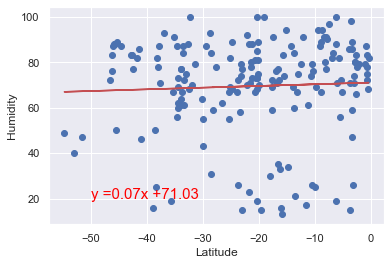

In [26]:
x_values = southernHemiDF["Lat"]
y_values = southernHemiDF["Humidity"]
plot_linear_regression(x_values,y_values,'Humidity',(-50,20))

The r-value of 0.004 indicates there is a none or very weak between humditity and latitude in the southern hemisphere

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.006812776337681226


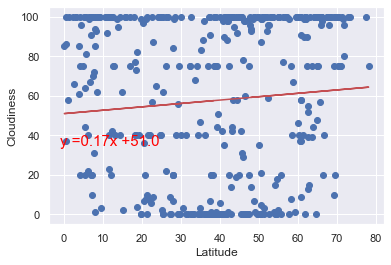

In [27]:
x_values = northernHemiDF["Lat"]
y_values = northernHemiDF["Cloudiness"]
plot_linear_regression(x_values,y_values,'Cloudiness',(-1,35))

The r-value of 0.002 indicates that there is no correlation between cloudiness and latitude

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.02778147335874488


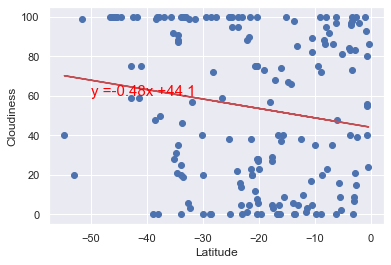

In [28]:
x_values = southernHemiDF["Lat"]
y_values = southernHemiDF["Cloudiness"]
plot_linear_regression(x_values,y_values,'Cloudiness',(-50,60))

The r-value of 0.002 indicates that none or very weak correlation between Cloudiness and latitude

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.003613718959451041


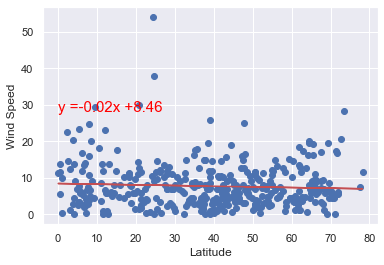

In [29]:
x_values = northernHemiDF["Lat"]
y_values = northernHemiDF["Wind Speed"]
plot_linear_regression(x_values,y_values,'Wind Speed',(0,28))

The r-value of 0.22 indicates there is none or very week correlation between wind speed and latitude in the northern hemisphere

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.012206523428121641


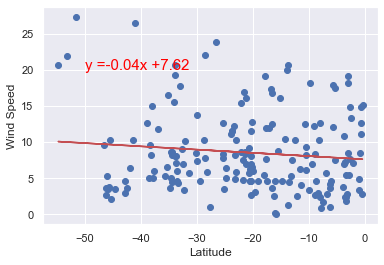

In [30]:
x_values = southernHemiDF["Lat"]
y_values = southernHemiDF["Wind Speed"]
plot_linear_regression(x_values,y_values,'Wind Speed',(-50,20))

The r-value of 0.32 indicates that there is weak correlation between wind speed and latitude in the southern hemisphere